**Project Objectives:**
1. Explore and understand the heart disease dataset through visualization and statistical analysis.
2. Preprocess the data effectively using pipelines, including handling missing values, encoding categorical features, and scaling numerical variables.
3. Train and evaluate multiple classification models:
   - Logistic Regression
   - Random Forest
   - SVM
   - K-Nearest Neighbors
4. Compare model performances using:
   - accuracy
   - precision
   - recall
   - F1-score
   - confusion matrices.
5. Visualize learning curves and classification reports to interpret model behavior and performance.

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier







In [4]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.info()
df.describe()
df.isnull().sum()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


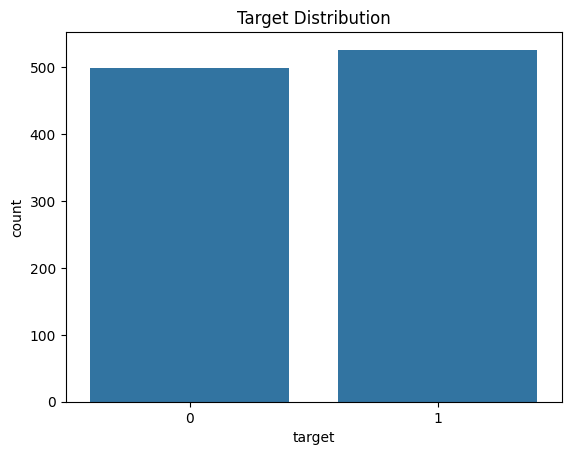

In [5]:
# Visualizing target distribution
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()


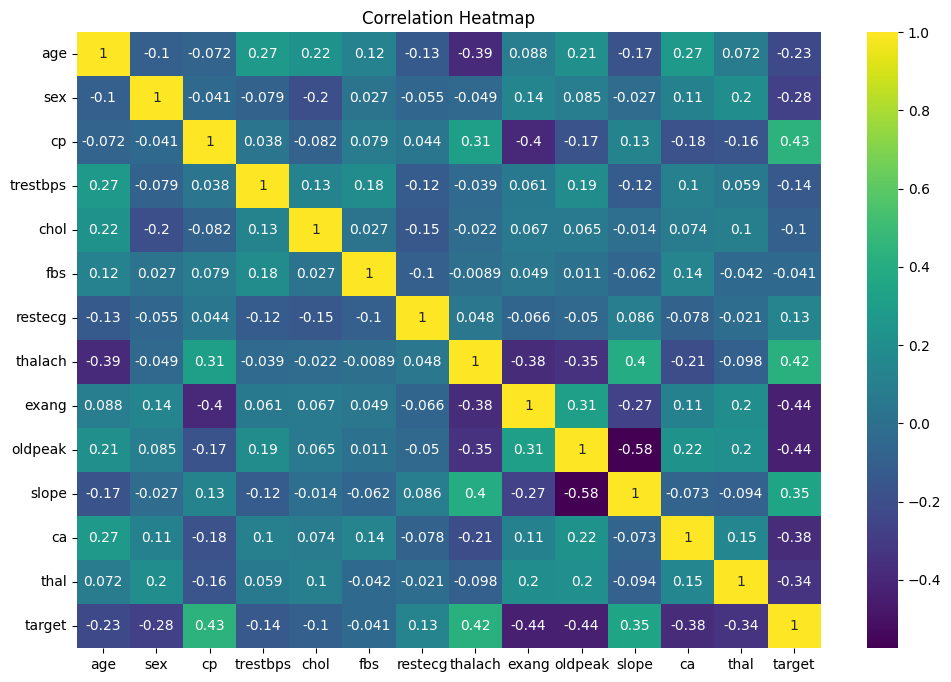

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


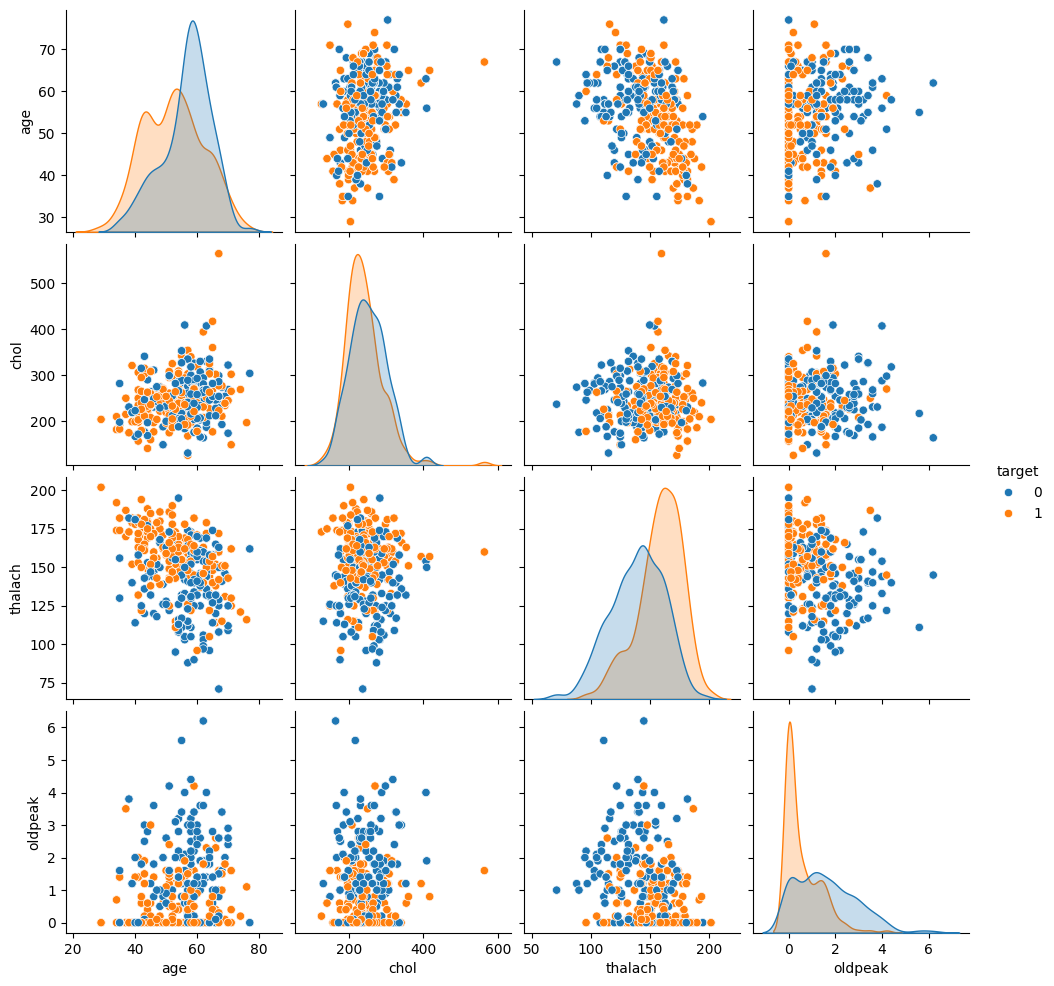

In [7]:
# Pairplot of selected features
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak','target']], hue='target')
plt.show()


# **Train before preprocessing**

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score

# Drop target from features
X = df.drop('target',axis=1)
y = df['target']


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Preprocessing**

In [10]:
# Define column lists
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [13]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [14]:
# Column Transformer for scaling and encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
], remainder='drop')

# **Models**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine":SVC(),
    "K-Nearest Neighbors":KNeighborsClassifier()
}

In [22]:
results = {}
for name,model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', model)
        ])
    scores = cross_val_score(pipeline,X,y,cv=5)
    results[name] = scores.mean()
    print(f"{name} Average Accuracy: {scores.mean():.4f}")
    print("Std score: ",scores.std())


Logistic Regression Average Accuracy: 0.8615
Std score:  0.028543880660151816
Random Forest Average Accuracy: 0.9902
Std score:  0.00816253684423489
Support Vector Machine Average Accuracy: 0.9229
Std score:  0.02570134609233071
K-Nearest Neighbors Average Accuracy: 0.8517
Std score:  0.018147390475842236


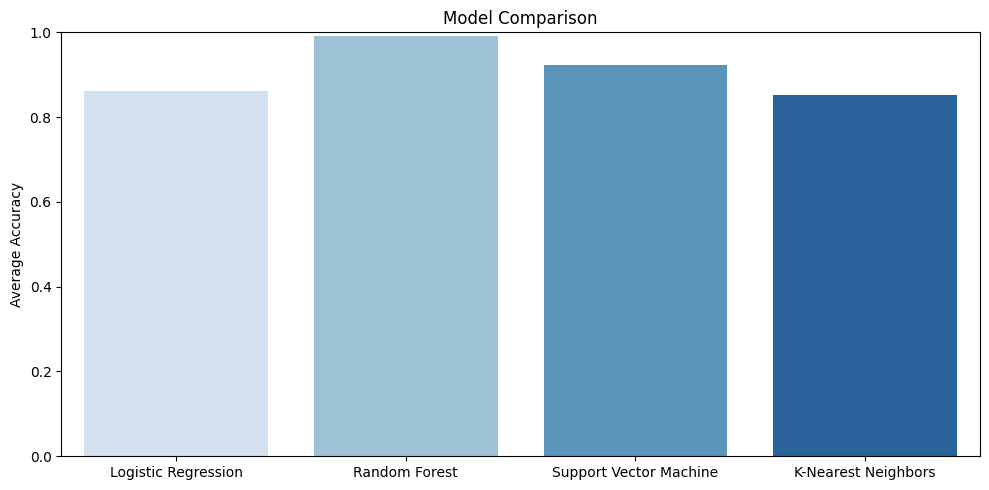

In [20]:
# Visualize Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()),palette = "Blues")
plt.ylabel("Average Accuracy")
plt.ylim(0,1)
plt.title("Model Comparison")
plt.grid(axis='y',linestyle ='none',alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_model = RandomForestClassifier()

final_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classsifier',best_model)
])

# Train model on final pipline

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

final_pipeline.fit(X_train,y_train)

y_pred = final_pipeline.predict(X_test)
report = classification_report(y_test, y_pred,output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



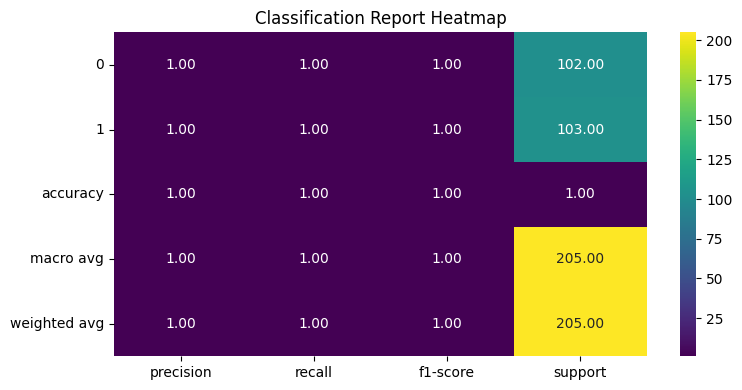

Confusion Matrix:  [[102   0]
 [  0 103]]


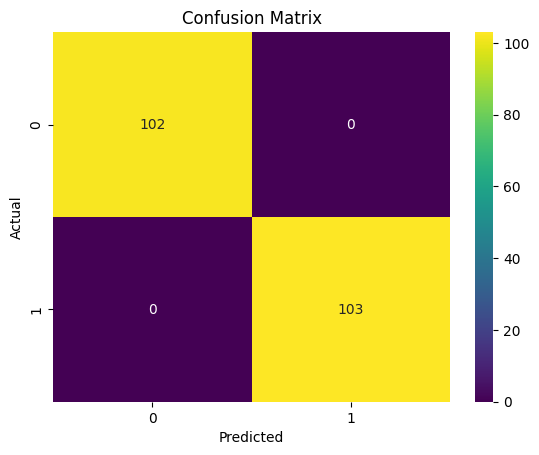

In [25]:
# Visualizing classification report

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
sns.heatmap(cm,annot=True,fmt="d",cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
import pickle

pickle.dump(final_pipeline,open('pipe.pkl','wb'))

In [30]:
pipe = pickle.load(open('pipe.pkl','rb'))